# Characterize 2-neuron coupled oscillators

Parameters of a general pair of coupled oscillators:
1. Oscillator parameters
2. Coupling parameters

---

For spiking oscillators, we have:
1. Oscillator parameters: (frequency control and initial phase control)
 
 Initial phase set manually, frequency controlled using external bias voltage V_0

2. **Coupling parameters (i.e. synaptic parameters):**

Post-Synaptic Potential waveform (peak normalized), and 
Synaptic weight (height of PSP)

For the specific case of a double exponential post-synaptic potential, the two time-constants \tau_0 and \tau_1 are free parameters

---

Hence, the free parameters are:

1. PSP time constants
2. synaptic weight

---

Goal: Answer the following:
1. How does frequency change due to coupling? What is the dependence of the change on the free parameters?
2. How do oscillator and coupling parameters influence settling time (time after which frequency stabilizes and phase difference is constant)?

In [1]:
import numpy as np, matplotlib.pyplot as plt
import math, time
from snn.components.neuron_class import Neuron
from snn.components.synapse_class import Synapse
from snn.components.network_class import *
from snn.functions import *

In [2]:
np.random.seed(0)

Text(0.5, 1.0, 'PSP waveform')

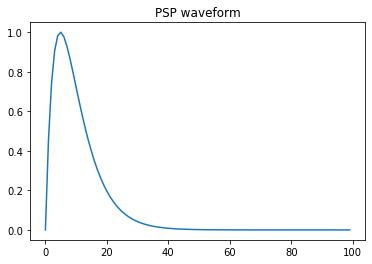

In [3]:
dt=1e-3
h = get_psp_waveform(dt, tau1=6e-3, tau2=4e-3)
plt.plot(h)
plt.title("PSP waveform")

In [54]:
def create_network(num_neurons, w_self, w_cross, adjacency_mat, psp_waveform, v_init, T):
    # create neurons
    net = Network('net')
    for i in range(num_neurons):
        net.add_neuron(Neuron(str(i)))
    
    # create synapses
    syn = np.argwhere(adjacency_mat)
    for j in range(syn.shape[0]):
        
        # self connections
        if syn[j,0]==syn[j,1]:
            net.add_synapse(Synapse(str(syn[j,0])+str(syn[j,1]),net.neurons[syn[j,0]],net.neurons[syn[j,1]], psp_waveform, w=w_self))
        
        #cross connections
        else:
            net.add_synapse(Synapse(str(syn[j,0])+str(syn[j,1]),net.neurons[syn[j,0]],net.neurons[syn[j,1]], psp_waveform, w=w_cross))
        
    probe = net.initialize(probe=True, T_total=T)
    net.v[:] = v_init.copy() 
    return net, probe
    

In [55]:
np.array([[1,1],[1,1]])

array([[1, 1],
       [1, 1]])

In [39]:
net.v

array([[0.65462909],
       [0.03728191]])

In [56]:
net2, p2 = create_network(2, -1, 1, np.array([[1, 0],[1, 1]]), h, np.array([[0], [0.1]]), 100)

In [57]:
[net2.neurons[j].name for j in range(2)]

['0', '1']

In [58]:
[net2.synapses[j].name for j in range(len(net2.synapses))]

['00', '10', '11']

In [4]:
w_self=-1
w_cross=1
v_init=np.random.uniform(0, 1, size=(2,))
net = Network('net')
n1 = Neuron('n1')
n2 = Neuron('n2')
neurons = [n1, n2]
net.add_neuron(n1)
net.add_neuron(n2)

syn12 = Synapse('syn_12', n1, n2, h, w=w_cross)
syn21 = Synapse('syn_21', n2, n1, h, w=w_cross) # symmetric connectivity

syn_self=[]
for i in range(2):
    syn_self.append(Synapse('syn_'+str(i)+str(i), neurons[i], neurons[i], h, w_self))
    net.add_synapse(syn_self[-1])

net.add_synapse(syn12)
net.add_synapse(syn21)


T = 1000

# assign initial v 
n1.v = v_init[0]
n2.v = v_init[1]

probe = net.initialize(probe=True, T_total = T)

V_0 = 1.5
v_ext = V_0*np.ones((2, T)) #same frequency of oscillation


tic = time.time()
for ti in range(T):
    net.update_state(dt, v_ext[:,ti].reshape((-1,1)), probe, ti)
    
print(f"Time take for {T} iterations={time.time()-tic}s")

Time take for 1000 iterations=0.11884307861328125s


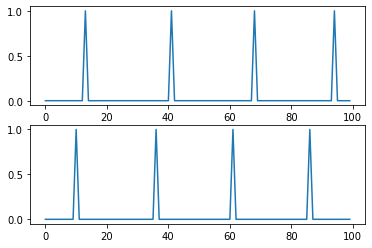

In [5]:
fig, ax = plt.subplots(2)
ax[0].plot(probe['spike'][n1.id,:100])
ax[1].plot(probe['spike'][n2.id,:100])

In [6]:
f_n1, fint_n1, floc_n1  = freq(probe['spike'][n1.id, :], dt, get_f_loc=True, get_f_interpolated=True)
f_n2, fint_n2, floc_n2  = freq(probe['spike'][n2.id, :], dt, get_f_loc=True, get_f_interpolated=True)

Text(0.5, 1, 'neuron 2')

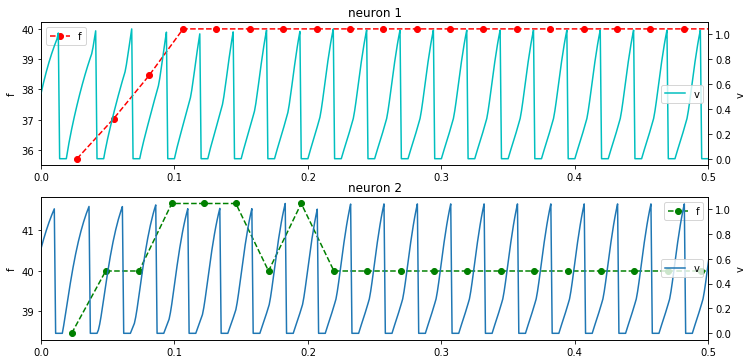

In [7]:
fig, ax = plt.subplots(2, figsize=(10,5))
fig.tight_layout()
ax[0].plot(floc_n1, f_n1, 'ro--')
ax0_A = ax[0].twinx()
ax0_A.plot([dt*i for i in range(T)] ,probe['v'][n1.id, :], 'c')
ax[0].set_xlim(0,0.5)
ax[1].plot(floc_n2, f_n2, 'go--')
ax1_A = ax[1].twinx()
ax1_A.plot([dt*i for i in range(T)] ,probe['v'][n2.id, :], '')
ax[1].set_xlim(0,0.5)

ax[0].legend('f_n1', )
ax0_A.legend('v_n1')
ax[1].legend('f_n2')
ax1_A.legend('v_n2')

ax[0].set_ylabel('f')
ax0_A.set_ylabel('v')
ax[1].set_ylabel('f')
ax1_A.set_ylabel('v')

ax[0].set_title('neuron 1')
ax[1].set_title('neuron 2')


<Figure size 720x360 with 0 Axes>

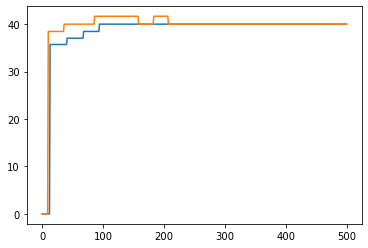

<Figure size 720x360 with 0 Axes>

In [8]:
plt.plot(fint_n1[:500])
plt.plot(fint_n2[:500])
# fig = plt.gcf()
plt.figure(figsize=(10,5))

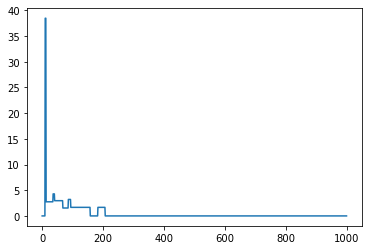

In [9]:
plt.plot(fint_n2-fint_n1)

In [10]:
fint_n2-fint_n1 <=1e-1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [11]:
np.argwhere(np.abs(fint_n2-fint_n1)>1e-1)[-1,0]

206

In [12]:
def settling_time(f_t1, f_t2, dt=1e-3, f_th=1e-3):
    delf = np.abs(f_t1-f_t2)
    t_settling = round(dt*np.argwhere(delf>f_th)[-1,0], 3)
    return t_settling
    

In [13]:
settling_time(fint_n1, fint_n2)

0.206

In [14]:
for i in range(5):
    w_self=-1
    w_cross=1
    v_init=np.random.uniform(0, 1, size=(2,))
    net = Network('net')
    n1 = Neuron('n1')
    n2 = Neuron('n2')
    neurons = [n1, n2]
    net.add_neuron(n1)
    net.add_neuron(n2)

    syn12 = Synapse('syn_12', n1, n2, h, w=w_cross)
    syn21 = Synapse('syn_21', n2, n1, h, w=w_cross) # symmetric connectivity

    syn_self=[]
    for i in range(2):
        syn_self.append(Synapse('syn_'+str(i)+str(i), neurons[i], neurons[i], h, w_self))
        net.add_synapse(syn_self[-1])

    net.add_synapse(syn12)
    net.add_synapse(syn21)


    T = 1000

    # assign initial v 
    n1.v = v_init[0]
    n2.v = v_init[1]

    probe = net.initialize(probe=True, T_total = T)

    V_0 = 1.5
    v_ext = V_0*np.ones((2, T)) #same frequency of oscillation


    tic = time.time()
    for ti in range(T):
        net.update_state(dt, v_ext[:,ti].reshape((-1,1)), probe, ti)

    f_n1, fint_n1, floc_n1  = freq(probe['spike'][n1.id, :], dt, get_f_interpolated=True)
    f_n2, fint_n2, floc_n2  = freq(probe['spike'][n2.id, :], dt, get_f_interpolated=True)

    t_settl = settling_time(fint_n1, fint_n2, dt, f_th=1e-3)
    print(t_settl)

0.236
0.208
0.151
0.149
0.179


In [17]:
net.neurons[0].name

'n1'

In [18]:
temp = np.random.randint(0, 2, size=(5,5))
print(temp)

[[0 1 1 1 1]
 [0 1 0 1 0]
 [1 1 0 1 1]
 [0 0 1 0 1]
 [1 1 1 1 0]]


In [21]:
temp2 = np.argwhere(temp)

In [22]:
temp2

array([[0, 1],
       [0, 2],
       [0, 3],
       [0, 4],
       [1, 1],
       [1, 3],
       [2, 0],
       [2, 1],
       [2, 3],
       [2, 4],
       [3, 2],
       [3, 4],
       [4, 0],
       [4, 1],
       [4, 2],
       [4, 3]], dtype=int64)

In [24]:
temp2.shape[0]

16

In [26]:
temp2[0,1]

1

In [27]:
range(temp2.shape[0])

range(0, 16)

In [28]:
net.v

array([[0.65462909],
       [0.03728191]])